В цьому домашньому завданні ми побудуємо рішення задачі логістичної регресії і створимо ваш перший submission на змагання на Kaggle. Усі кроки були розглянуті в лекції та містяться в ноутбуці `Логістична регресія з ScikitLearn. Повна ML задача.ipynb`, але тепер ми їх адаптуємо до іншої задачі - все як в реальному житті, коли ви знайшли код у відкритих джерелах і адаптуєте на проєкті 😉

**Погнали! 🚀🚀🚀**

-----------



0. Завантажте дані `train.csv`, `test.csv`, `sample_submission.csv` зі змагання на Kaggle ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/competitions/bank-customer-churn-prediction-dlu-course-c-3). Для завантаження потрібно долучитись до змагання (натиснути кнопку "Join").

1. Зчитайте дані `train.csv` в pandas dataframe та розбийте їх на train і validation піднабори.

  * Є такий параметр в методі train_test_split як stratified. Можливо він буде Вам корисним при розбитті даних в цій задачі. Пропоную Вам почитати про нього в документації і спробувати скористатись.

In [659]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [660]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [661]:
train_df = pd.read_csv("/content/drive/MyDrive/Machine_Learning/datasets/module_02_02/bank-customer-churn-prediction-dlu-course-c-3/train.csv")
train_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,1,15650086.0,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,2,15733602.0,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,3,15645794.0,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,4,15633840.0,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0


In [662]:
train_df = train_df.drop(columns = ['id', 'CustomerId', 'Surname'])

In [663]:
train, validation = train_test_split(train_df, test_size=0.2, random_state=42, stratify=train_df['Exited'])
train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7180,682.0,France,Male,30.0,1.0,131394.56,1.0,1.0,1.0,143952.24,0.0
10393,684.0,France,Female,39.0,2.0,178058.06,1.0,1.0,0.0,145518.31,0.0
80,705.0,Germany,Male,35.0,6.0,116320.68,2.0,1.0,0.0,174431.01,0.0
3365,669.0,Spain,Male,58.0,0.0,0.00,2.0,0.0,1.0,51565.98,0.0
12236,707.0,France,Male,21.0,3.0,0.00,2.0,1.0,1.0,148564.76,0.0


In [664]:
validation.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6490,714.0,Germany,Male,46.0,1.0,115764.32,4.0,1.0,1.0,72945.32,1.0
3646,593.0,France,Male,41.0,5.0,0.00,2.0,1.0,1.0,38196.24,0.0
5306,731.0,France,Female,38.0,2.0,0.00,2.0,0.0,1.0,116971.05,0.0
652,673.0,France,Female,43.0,4.0,155739.76,1.0,0.0,1.0,111622.76,0.0
2627,678.0,Spain,Female,30.0,4.0,0.00,2.0,1.0,0.0,143681.85,0.0


2. Визначіть назви колонок, які сформують вхідні незалежні дані, в змінній `input_cols` та назву колонки , яка є цільовою, в змінній `target_col`. Використовуючи `input_cols` та `target_col` створіть набори даних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` - де `inputs` - вхідні дані (датафрейм), `targets` - дані цільової колонки відповідного піднабору.

In [665]:
input_cols = list(train_df.columns)[0:-1]
input_cols

['CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [666]:
target_col = 'Exited'
target_col

'Exited'

In [667]:
train_inputs = train[input_cols].copy()
train_targets = train[target_col].copy()
val_inputs = validation[input_cols].copy()
val_targets = validation[target_col].copy()

train_inputs.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7180,682.0,France,Male,30.0,1.0,131394.56,1.0,1.0,1.0,143952.24
10393,684.0,France,Female,39.0,2.0,178058.06,1.0,1.0,0.0,145518.31
80,705.0,Germany,Male,35.0,6.0,116320.68,2.0,1.0,0.0,174431.01
3365,669.0,Spain,Male,58.0,0.0,0.00,2.0,0.0,1.0,51565.98
12236,707.0,France,Male,21.0,3.0,0.00,2.0,1.0,1.0,148564.76


In [668]:
train_targets.head()

,Exited
7180,0.0
10393,0.0
80,0.0
3365,0.0
12236,0.0


In [669]:
val_inputs.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6490,714.0,Germany,Male,46.0,1.0,115764.32,4.0,1.0,1.0,72945.32
3646,593.0,France,Male,41.0,5.0,0.00,2.0,1.0,1.0,38196.24
5306,731.0,France,Female,38.0,2.0,0.00,2.0,0.0,1.0,116971.05
652,673.0,France,Female,43.0,4.0,155739.76,1.0,0.0,1.0,111622.76
2627,678.0,Spain,Female,30.0,4.0,0.00,2.0,1.0,0.0,143681.85


In [670]:
val_targets.head()

,Exited
6490,1.0
3646,0.0
5306,0.0
652,0.0
2627,0.0


3. Визначіть з допомогою `pandas.DataFrame.select_dtypes` назви колонок, які є числовими і категоріальними. Запишіть результати в `numeric_cols` та `categorical_cols` відповідно.

In [671]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

numeric_cols

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [672]:
categorical_cols

['Geography', 'Gender']

4. Зробіть підготовку даних в категоріальних і числових колонках для входу в модель виходячи з освоєного на даний момент на курсі. Варіанти пеердобробки, з якими ми вже знайомі:
  - масштабування числових ознак,
  - заповнення пропущених значень, якщо вони є,
  - кодування категоріальних ознак, вилучення ознак, якщо ми вважаємо, що ці дані нерелевантні для моделі аби ми не бачимо способу як їх так закодувати, аби подати на вхід моделі.

  Тут є багато варіантів, як Ви побудуєте передобробку, важливо аби
  1) передобробка мала сенс (немає сенсу заповнювати дані константою, яку ми не зрозуміло звідки взяли)   
  2) має бути виконана принаймні одна дія передобробки
  3) обробка маэ бути виконана коректно і для тренувальних, і для вал. даних
  4) чим вищий у Вас врешті вийде ROС AUC скор, тим більше шансів перемогти у змаганні :)

  Опишіть рішення проведення кожного з кроків передобробки. Для чого ви його робите? По завершенню виведіть по 5 значен з `train_inputs`, `val_inputs` використовуючи `display()`.

### Пошук пропущених значень

In [673]:
train_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12000 entries, 7180 to 9360
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      12000 non-null  float64
 1   Geography        12000 non-null  object 
 2   Gender           12000 non-null  object 
 3   Age              12000 non-null  float64
 4   Tenure           12000 non-null  float64
 5   Balance          12000 non-null  float64
 6   NumOfProducts    12000 non-null  float64
 7   HasCrCard        12000 non-null  float64
 8   IsActiveMember   12000 non-null  float64
 9   EstimatedSalary  12000 non-null  float64
dtypes: float64(8), object(2)
memory usage: 1.0+ MB


In [674]:
val_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 6490 to 3024
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      3000 non-null   float64
 1   Geography        3000 non-null   object 
 2   Gender           3000 non-null   object 
 3   Age              3000 non-null   float64
 4   Tenure           3000 non-null   float64
 5   Balance          3000 non-null   float64
 6   NumOfProducts    3000 non-null   float64
 7   HasCrCard        3000 non-null   float64
 8   IsActiveMember   3000 non-null   float64
 9   EstimatedSalary  3000 non-null   float64
dtypes: float64(8), object(2)
memory usage: 257.8+ KB


In [675]:
train_targets.info()

<class 'pandas.core.series.Series'>
Index: 12000 entries, 7180 to 9360
Series name: Exited
Non-Null Count  Dtype  
--------------  -----  
12000 non-null  float64
dtypes: float64(1)
memory usage: 187.5 KB


In [676]:
val_targets.info()

<class 'pandas.core.series.Series'>
Index: 3000 entries, 6490 to 3024
Series name: Exited
Non-Null Count  Dtype  
--------------  -----  
3000 non-null   float64
dtypes: float64(1)
memory usage: 46.9 KB


В датасеті немає пропусків, всі значення заповнені

### Аналіз числових полів

In [677]:
train_inputs[numeric_cols].describe().round(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00
mean,658.84,37.69,5.03,43008.17,1.59,0.79,0.49,117992.40
std,72.33,8.14,2.78,59906.63,0.53,0.41,0.50,45589.48
min,431.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58
25%,603.00,32.00,3.00,0.00,1.00,1.00,0.00,83343.73
50%,661.00,37.00,5.00,0.00,2.00,1.00,0.00,123613.91
75%,708.00,42.00,7.00,109949.05,2.00,1.00,1.00,156912.81
max,850.00,74.00,10.00,209767.31,4.00,1.00,1.00,199992.48


In [678]:
val_inputs[numeric_cols].describe().round(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00
mean,659.36,37.95,5.02,41616.26,1.59,0.78,0.48,116953.73
std,71.95,8.53,2.76,59001.35,0.53,0.41,0.50,46308.11
min,434.00,19.00,0.00,0.00,1.00,0.00,0.00,479.54
25%,604.00,32.00,3.00,0.00,1.00,1.00,0.00,82617.47
50%,663.00,37.00,5.00,0.00,2.00,1.00,0.00,122960.98
75%,708.00,42.00,7.00,107757.52,2.00,1.00,1.00,156687.36
max,850.00,72.00,10.00,185966.64,4.00,1.00,1.00,199953.33


Видно, що в колонці Balance скошений розподіл даних (наприклад, медіана становить 0, а середнє значення становить 43К). Тому варто застосувати логарифмічну трансформацію

In [679]:
train_inputs['Balance'] = np.log1p(train_inputs['Balance'])
train_inputs[numeric_cols].describe().round(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00
mean,658.84,37.69,5.03,4.12,1.59,0.79,0.49,117992.40
std,72.33,8.14,2.78,5.59,0.53,0.41,0.50,45589.48
min,431.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58
25%,603.00,32.00,3.00,0.00,1.00,1.00,0.00,83343.73
50%,661.00,37.00,5.00,0.00,2.00,1.00,0.00,123613.91
75%,708.00,42.00,7.00,11.61,2.00,1.00,1.00,156912.81
max,850.00,74.00,10.00,12.25,4.00,1.00,1.00,199992.48


In [680]:
val_inputs['Balance'] = np.log1p(val_inputs['Balance'])
val_inputs[numeric_cols].describe().round(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00
mean,659.36,37.95,5.02,4.02,1.59,0.78,0.48,116953.73
std,71.95,8.53,2.76,5.55,0.53,0.41,0.50,46308.11
min,434.00,19.00,0.00,0.00,1.00,0.00,0.00,479.54
25%,604.00,32.00,3.00,0.00,1.00,1.00,0.00,82617.47
50%,663.00,37.00,5.00,0.00,2.00,1.00,0.00,122960.98
75%,708.00,42.00,7.00,11.59,2.00,1.00,1.00,156687.36
max,850.00,72.00,10.00,12.13,4.00,1.00,1.00,199953.33


Тепер можна застосувати масштабування числових ознак (це потрібно, щоб різниця в абсолютних значеннях числових полів не викривлювала модель):

In [681]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_inputs[numeric_cols])

train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])

In [682]:
train_inputs[numeric_cols].describe().round(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00
mean,0.54,0.35,0.50,0.34,0.20,0.79,0.49,0.59
std,0.17,0.15,0.28,0.46,0.18,0.41,0.50,0.23
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.41,0.25,0.30,0.00,0.00,1.00,0.00,0.42
50%,0.55,0.34,0.50,0.00,0.33,1.00,0.00,0.62
75%,0.66,0.43,0.70,0.95,0.33,1.00,1.00,0.78
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [683]:
val_inputs[numeric_cols].describe().round(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00
mean,0.55,0.36,0.50,0.33,0.20,0.78,0.48,0.58
std,0.17,0.15,0.28,0.45,0.18,0.41,0.50,0.23
min,0.01,0.02,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.41,0.25,0.30,0.00,0.00,1.00,0.00,0.41
50%,0.55,0.34,0.50,0.00,0.33,1.00,0.00,0.61
75%,0.66,0.43,0.70,0.95,0.33,1.00,1.00,0.78
max,1.00,0.96,1.00,0.99,1.00,1.00,1.00,1.00


### Кодування категоріальних ознак

In [684]:
 train_df[categorical_cols].nunique()

,0
Geography,3
Gender,2


Для колонок 'Geography' i 'Gender' можна застосувати one-hot encoding:


In [685]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(train_inputs[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [686]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male']


In [687]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])

train_inputs.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
7180,0.599045,France,Male,0.214286,0.1,0.961825,0.000000,1.0,1.0,0.719772,1.0,0.0,0.0,0.0,1.0
10393,0.603819,France,Female,0.375000,0.2,0.986625,0.000000,1.0,0.0,0.727603,1.0,0.0,0.0,1.0,0.0
80,0.653938,Germany,Male,0.303571,0.6,0.951881,0.333333,1.0,0.0,0.872180,0.0,1.0,0.0,0.0,1.0
3365,0.568019,Spain,Male,0.714286,0.0,0.000000,0.333333,0.0,1.0,0.257797,0.0,0.0,1.0,0.0,1.0
12236,0.658711,France,Male,0.053571,0.3,0.000000,0.333333,1.0,1.0,0.742837,1.0,0.0,0.0,0.0,1.0


In [688]:
val_inputs.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
6490,0.675418,Germany,Male,0.500000,0.1,0.951489,1.000000,1.0,1.0,0.364704,0.0,1.0,0.0,0.0,1.0
3646,0.386635,France,Male,0.410714,0.5,0.000000,0.333333,1.0,1.0,0.190942,1.0,0.0,0.0,0.0,1.0
5306,0.715990,France,Female,0.357143,0.2,0.000000,0.333333,0.0,1.0,0.584853,1.0,0.0,0.0,1.0,0.0
652,0.577566,France,Female,0.446429,0.4,0.975696,0.000000,0.0,1.0,0.558109,1.0,0.0,0.0,1.0,0.0
2627,0.589499,Spain,Female,0.214286,0.4,0.000000,0.333333,1.0,0.0,0.718420,0.0,0.0,1.0,1.0,0.0


In [689]:
from IPython.display import display

display(train_inputs.head())
display(val_inputs.head())

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
7180,0.599045,France,Male,0.214286,0.1,0.961825,0.000000,1.0,1.0,0.719772,1.0,0.0,0.0,0.0,1.0
10393,0.603819,France,Female,0.375000,0.2,0.986625,0.000000,1.0,0.0,0.727603,1.0,0.0,0.0,1.0,0.0
80,0.653938,Germany,Male,0.303571,0.6,0.951881,0.333333,1.0,0.0,0.872180,0.0,1.0,0.0,0.0,1.0
3365,0.568019,Spain,Male,0.714286,0.0,0.000000,0.333333,0.0,1.0,0.257797,0.0,0.0,1.0,0.0,1.0
12236,0.658711,France,Male,0.053571,0.3,0.000000,0.333333,1.0,1.0,0.742837,1.0,0.0,0.0,0.0,1.0


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
6490,0.675418,Germany,Male,0.500000,0.1,0.951489,1.000000,1.0,1.0,0.364704,0.0,1.0,0.0,0.0,1.0
3646,0.386635,France,Male,0.410714,0.5,0.000000,0.333333,1.0,1.0,0.190942,1.0,0.0,0.0,0.0,1.0
5306,0.715990,France,Female,0.357143,0.2,0.000000,0.333333,0.0,1.0,0.584853,1.0,0.0,0.0,1.0,0.0
652,0.577566,France,Female,0.446429,0.4,0.975696,0.000000,0.0,1.0,0.558109,1.0,0.0,0.0,1.0,0.0
2627,0.589499,Spain,Female,0.214286,0.4,0.000000,0.333333,1.0,0.0,0.718420,0.0,0.0,1.0,1.0,0.0


5. Збережіть дані, що містяться в змінних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` на диск в форматі `parquet`. В кінці виведіть список файлів в папці, в яку Ви зберегли файли і перевірте, чи файли збереглись. Вивести список файлів можна з `os.listdir(your_dir)` або `!ls your_dir`

In [690]:
folder_path = "/content/drive/MyDrive/Machine_Learning/datasets/module_02_02/bank-customer-churn-prediction-dlu-course-c-3/parquet_data/"
train_inputs.to_parquet(folder_path + 'train_inputs.parquet')
train_targets.to_frame().to_parquet(folder_path + 'train_targets.parquet')
val_inputs.to_parquet(folder_path + 'val_inputs.parquet')
val_targets.to_frame().to_parquet(folder_path + 'val_targets.parquet')

In [691]:
import os
os.listdir("/content/drive/MyDrive/Machine_Learning/datasets/module_02_02/bank-customer-churn-prediction-dlu-course-c-3/parquet_data/")

['train_inputs.parquet',
 'train_targets.parquet',
 'val_inputs.parquet',
 'val_targets.parquet']

6. З підготовлених вхіжних даних створіть `X_train`, `X_val` набори, які містять лише колонки, які підуть на вхід моделі. Навчіть модель бінарної класифікації з допомогою `LogisticRegression` в `scikit-learn`.

In [692]:
X_train = train_inputs.drop(columns=['Geography', 'Gender'])
X_val = val_inputs.drop(columns=['Geography', 'Gender'])

In [693]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')
model.fit(X_train, train_targets)


LogisticRegression(solver='liblinear')

7. Виведіть Confusion matrix, ROC Curve, метрику AUROC та метрику F1 Score для порога класифікації 0.5 для побудованої моделі на тренувальних та валідаційних даних. Що можете сказати про якіст моделі? Вона хороша, погана, задовільна?

Accuracy: 87.41%


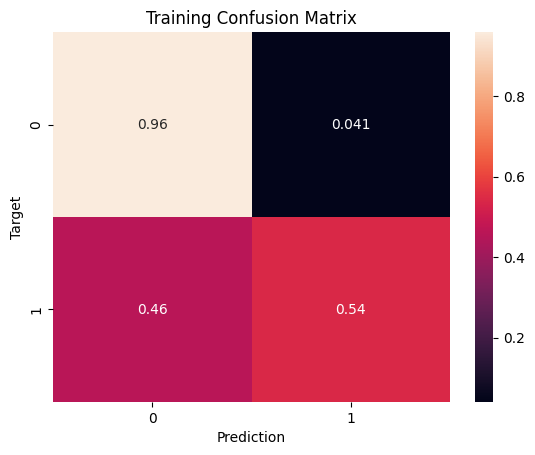

In [694]:
from sklearn.metrics import confusion_matrix
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));

    return preds

train_preds = predict_and_plot(X_train, train_targets, 'Training')

Accuracy: 87.07%


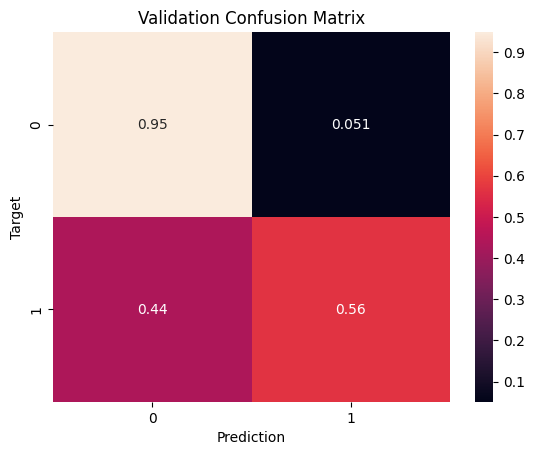

In [602]:
train_preds = predict_and_plot(X_val, val_targets, 'Validation')

In [695]:
def random_guess(inputs):
    return np.random.choice([0.0, 1.0], len(inputs))

accuracy_score(train_targets, random_guess(X_train))

0.49575

Отже, наша модель показує кращу точність (87%), ніж випадкова модель (50%)

In [696]:
from sklearn.metrics import f1_score
def get_f1_score(inputs, targets, name=''):
  preds = model.predict(inputs)

  f1_score_ = f1_score(targets, preds, pos_label=1.0)
  print(f"F1 score {name}: {f1_score_:.2f}%")

get_f1_score(X_train, train_targets, 'Training')
get_f1_score(X_val, val_targets, 'Validation')

F1 score Training: 0.64%
F1 score Validation: 0.64%


F1 score більший нуля і він однаковий на тренувальному і валідаційному датасетах, це позитивно

AUROC for Training: 0.88


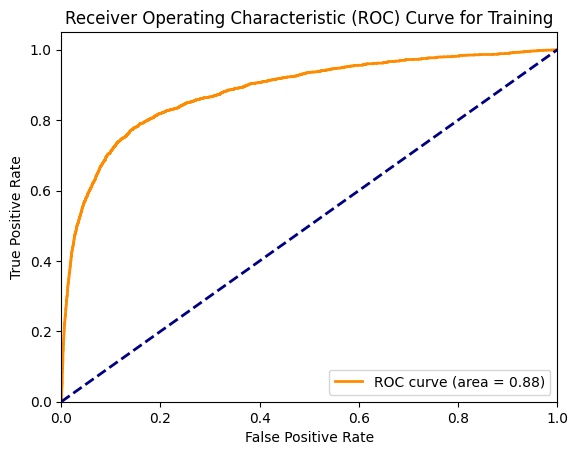

AUROC for Validation: 0.88


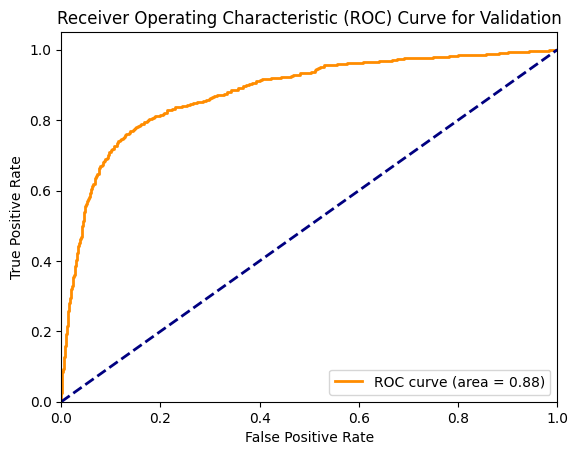

In [697]:
from sklearn.metrics import roc_curve, auc

def compute_auroc_and_build_roc(inputs, targets, name=''):
  # Predict probabilities
  y_pred_proba = model.predict_proba(inputs)[:, 1]

  # Compute ROC curve
  fpr, tpr, thresholds = roc_curve(targets, y_pred_proba, pos_label=1.0)

    # Compute AUROC
  roc_auc = auc(fpr, tpr)
  print(f'AUROC for {name}: {roc_auc:.2f}')

  # Plot the ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'Receiver Operating Characteristic (ROC) Curve for {name}')
  plt.legend(loc="lower right")
  plt.show()

compute_auroc_and_build_roc(X_train, train_targets, 'Training')
compute_auroc_and_build_roc(X_val, val_targets, 'Validation')

### Висновок:
На основі результатів вище, можна сказати, що модель хорошої якості

8. Створіть передбачення моделі, яка передбачає завжди мажоритарний клас (той, якого більше в тренувальних даних). Порахуйте Accuracy на тренувальних та валідаційних даних для цієї моделі і тої, що ми натренували в п.6. Зробіть заключення про якість нашої моделі: якість хороша, погана, задовільна?

In [698]:
 train_df['Exited'].value_counts()

,count
Exited,
0.0,11948
1.0,3052


In [699]:
def all_no(inputs):
    return np.full(len(inputs), 0.0)
accuracy_score(train_targets, all_no(X_train))

0.7965

In [700]:
accuracy_score(val_targets, all_no(X_val))

0.7966666666666666

Отже, наша модель має вищу точність (87%), ніж модель, яка завжди передбачає негативну відповідь (80%). Це говорить на користь того, наша модель хорошої якості

9. Збережіть модель і інші обʼєкти, які ви хотіли б зберегти, з використанням бібліотеки joblib в файл `log_reg.joblib`. Потім завантажте модель з файлу в змінну `model_2` (цим ми тренуємось завантажувати модель з файлу на майбутнє).

In [701]:
import joblib

In [702]:
objects = {
    'model': model,
    'scaler': scaler,
    'encoder': encoder
}

joblib.dump(objects, 'log_reg.joblib')

['log_reg.joblib']

In [703]:
model_2 = joblib.load('log_reg.joblib')
model_2

{'model': LogisticRegression(solver='liblinear'),
 'scaler': MinMaxScaler(),
 'encoder': OneHotEncoder(handle_unknown='ignore', sparse_output=False)}

10. Ознайомтесь з роботою наведеної функції `predict_raw_df`. Ця функція робить підготовку даних (масштабування числових колонок і кодування категоріальних) і виводить ймовірності належності до класу 1 для кожного рядка в наданому наборі.

Доповніть або внесіть зміни у функцію з врахуванням вашого препроцесингу даних.

In [704]:
import warnings
warnings.filterwarnings("ignore")

def predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, input_df: pd.DataFrame):
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = pd.concat([input_df[numeric_cols], input_df[encoded_cols]], axis=1)
    prob = model.predict_proba(X_input)[:,1]
    return prob

In [706]:
predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, train_inputs[:5])

array([0.00440158, 0.03600705, 0.04976241, 0.00359374, 0.00292889])

11. Зчитайте дані з `test.csv` в змінну `test_raw_df`. Зробіть передбачення для кожного рядка даних з функцією з попереднього завдання і запишіть результат в нову колонку `Exited` в датафреймі `test_raw_df`.

In [707]:
test_raw_df = pd.read_csv("/content/drive/MyDrive/Machine_Learning/datasets/module_02_02/bank-customer-churn-prediction-dlu-course-c-3/test.csv")
test_raw_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15000,15594796.0,Chu,584.0,Germany,Male,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86
1,15001,15642821.0,Mazzi,551.0,France,Male,39.0,5.0,0.00,2.0,1.0,1.0,67431.28
2,15002,15716284.0,Onyekachi,706.0,France,Male,43.0,8.0,0.00,2.0,1.0,0.0,156768.45
3,15003,15785078.0,Martin,717.0,Spain,Male,45.0,3.0,0.00,1.0,1.0,1.0,166909.87
4,15004,15662955.0,Kenechukwu,592.0,Spain,Male,43.0,8.0,0.00,2.0,1.0,1.0,143681.97


In [708]:
test_inputs = test_raw_df.drop(columns=['id', 'CustomerId', 'Surname'])
test_raw_df['Exited'] = predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, test_inputs)
test_raw_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15000,15594796.0,Chu,584.0,Germany,Male,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86,0.000000
1,15001,15642821.0,Mazzi,551.0,France,Male,39.0,5.0,0.00,2.0,1.0,1.0,67431.28,0.035745
2,15002,15716284.0,Onyekachi,706.0,France,Male,43.0,8.0,0.00,2.0,1.0,0.0,156768.45,0.154373
3,15003,15785078.0,Martin,717.0,Spain,Male,45.0,3.0,0.00,1.0,1.0,1.0,166909.87,0.201018
4,15004,15662955.0,Kenechukwu,592.0,Spain,Male,43.0,8.0,0.00,2.0,1.0,1.0,143681.97,0.056533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24995,15642997.0,Chukwumaobim,639.0,Spain,Male,38.0,10.0,0.00,2.0,1.0,1.0,49637.65,0.022472
9996,24996,15739271.0,Clements,678.0,Spain,Male,39.0,9.0,0.00,2.0,1.0,1.0,142513.50,0.026435
9997,24997,15756743.0,Chidiebere,774.0,France,Male,30.0,9.0,0.00,2.0,1.0,0.0,4861.72,0.018774
9998,24998,15680167.0,Yermakova,595.0,France,Male,38.0,6.0,144875.79,1.0,1.0,0.0,126469.09,0.000000


12. Зчитайте файл 'sample_submission.csv' і зповніть колонку `Exited` передбаченими вашою моделлю значеннями для кожного відповідного `id` клієнта.
Виведіть перші 5 рядків фінального датасету, збережіть результат в файл `submission_log_reg.csv` (УВАГА! не запишіть випадково ще індекси рядків!) і здайте цей файл на Kaggle зі свого профіля натиснувши `Submit Prediction`.

In [710]:
submission_log_reg = pd.read_csv("/content/drive/MyDrive/Machine_Learning/datasets/module_02_02/bank-customer-churn-prediction-dlu-course-c-3/sample_submission.csv")
submission_log_reg.head()

,id,Exited
0,15000,0.5
1,15001,0.5
2,15002,0.5
3,15003,0.5
4,15004,0.5


In [716]:
submission_log_reg['Exited'] = submission_log_reg['id'].map(test_raw_df.set_index('id')['Exited'])
submission_log_reg.reset_index(drop=True, inplace=True)
submission_log_reg.head()

,id,Exited
0,15000,0.000000
1,15001,0.035745
2,15002,0.154373
3,15003,0.201018
4,15004,0.056533


In [718]:
submission_log_reg.to_csv("/content/drive/MyDrive/Machine_Learning/datasets/module_02_02/bank-customer-churn-prediction-dlu-course-c-3/submission_log_reg.csv", index=False)